In [1]:
from pykat import finesse        
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
import scipy.signal

                                              ..-
    PyKat 1.2.73          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [13]:
basecode = """
    # laser (n0)------------> (n1)|M1|(n2)<---->s(3k)<--------->(n3)|M2|(n4)
            l laser 1 0 n0
            s s0 0.1 n0 n1
            #the cavity
            
            m1 M1 0.15 0 0 n1 n2
            s scav 3k n2 n3
            m1 M2 0.15 0 0 n3 n4
  
"""

In [14]:
basekat = finesse.kat() 
basekat.verbose = False
basekat.parse(basecode)

In [15]:
kat1 = basekat.deepcopy()

In [16]:
PDcode = """

            # Photo diodes measuring DC-power
          
            pd refl n1          # Reflected field
            pd circ n3          # Circulating field
            pd tran n4          # Transmitted field
            ## Simulation instructions ##
            
            xaxis M2 phi lin -20 200 300    
            yaxis abs                       
  
"""

In [17]:
kat1.parse(PDcode)
out1 = kat1.run()

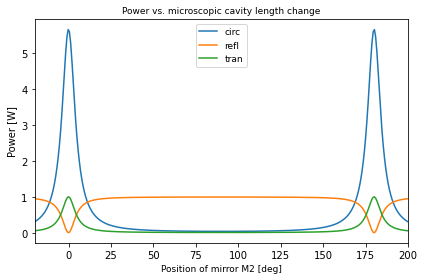

In [18]:
out1.plot(xlabel='Position of mirror M2 [deg]',
          ylabel='Power [W]', 
          title = 'Power vs. microscopic cavity length change')

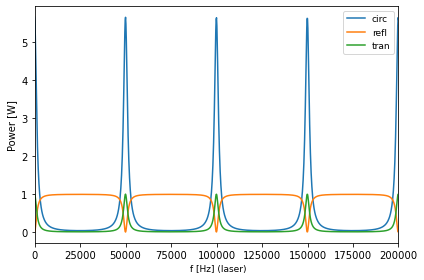

In [19]:
kat2 = kat1.deepcopy()
kat2.parse("xaxis laser f lin 0 200k 1000")
out = kat2.run()
fig = out.plot(ylabel="Power [W]")

In [20]:
indexes = scipy.signal.find_peaks_cwt(out['circ'], np.ones_like(out['circ']))

In [21]:
print("Modelled FSR: ", out.x[indexes][2]-out.x[indexes][1])

Modelled FSR:  50000.0


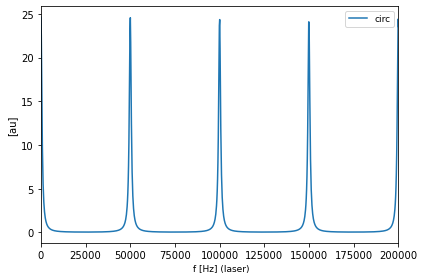

In [22]:
kat3 = kat2.deepcopy()
kat3.M2.setRTL(1,0,0)
out = kat3.run()
out.plot(detectors=['circ'])

In [23]:
indexes = scipy.signal.find_peaks_cwt(out['circ'], np.ones_like(out['circ']))
FSR = out.x[indexes][2] - out.x[indexes][1]
FSR

50000.0

In [24]:
kat4 = kat3.deepcopy()
kat4.parse("""
xaxis laser f lin 49k 51k 1000
""")
out = kat4.run()

Text(0.5, 0, 'f [Hz]')

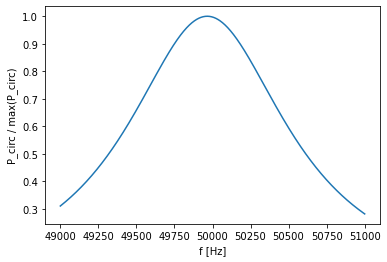

In [25]:
plt.plot(out.x, out['circ']/out['circ'].max())
plt.ylabel("P_circ / max(P_circ)")
plt.xlabel("f [Hz]")

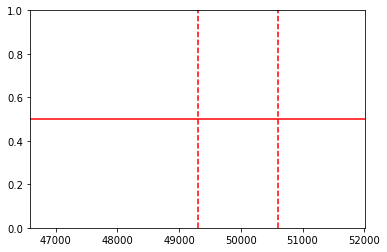

In [26]:

plt.axhline(0.5,color='r')
plt.axvline(49300,color='r',ls='--')
plt.axvline(50600,color='r',ls='--')


In [27]:
print("Modelled finesse =", FSR/1300)

Modelled finesse = 38.46153846153846


In [28]:
print("Calculated finesse =", np.pi / (1 - np.sqrt(0.85)) )

Calculated finesse = 40.25331978158252
